# WeatherPy

# # Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

### Analysis

* __Observed Trend 1__: Based on the figure "Latitude and Max. Temperature", it's observed that the highest temperature are found at cities with latitude close to zero. On the other hand, the lowest temperature are found at cities with latitude below -20 and above 40.
* __Observed Trend 2__:  Based on the figure "Latitude vs. Humidity", it's observed that the humidity is not very well associated with the latitude factor.
* __Observed Trend 3__: Based on the figure "Latitude vs. Wind speed", it's observed that the wind speed is not very well associated with the latitude factor.
* __Observed Trend 4__: Based on the figure "Latitude vs. cloudiness", it's observed that the cloudiness is not very well associated with the latitude factor.

In [5]:
#dependencies and API key
import pandas as pd
import time
import numpy as np
import random
import json
from datetime import datetime
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from api_keys import api_key

## Generate Cities List

In [6]:
# Output
output_file = "output_data/cities.csv"
#latitudes and longitudes
Lat = np.random.choice(range(-90,90),10000)
Lon = np.random.choice(range(-180,180),10000)
LatLon = pd.DataFrame({"Latitude":Lat,"Longitude":Lon}) 

In [7]:
Lat = pd.DataFrame({"Latitude":Lat,"Longitude":Lon})        
Lat["Closest City name"] = ""
Lat["Closest Country code"] = ""
for index,row in LatLon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    LatLon.set_value(index,"Closest City name",city.city_name)
    LatLon.set_value(index,"Closest Country code",city.country_code.upper())
uLatLon = LatLon.dropna()
uLatLon = uLatLon.drop_duplicates()
# 600 cities
SCities = uLatLon.sample(600)
SCities =SCities.reset_index()
SCities = SCities.iloc[:,[3,4]]

C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [8]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

## Perform API Calls

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :api_key,"units":"imperial" }
print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")
for index,row in SCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()
    SCities.set_value(index,"Latitude",CWRespJson.get("coord",{}).get("lat"))
    SCities.set_value(index,"Longitude",CWRespJson.get("coord",{}).get("lon"))
    SCities.set_value(index,"Temperature",CWRespJson.get("coord",{}).get("lon"))
    SCities.set_value(index,"Max Temp",CWRespJson.get("main",{}).get("temp_max"))
    SCities.set_value(index,"Wind speed",CWRespJson.get("wind",{}).get("speed"))
    SCities.set_value(index,"Humidity",CWRespJson.get("main",{}).get("humidity"))
    SCities.set_value(index,"Cloudiness",CWRespJson.get("clouds",{}).get("all"))
    SCities.set_value(index,"Date",CWRespJson.get("dt"))
print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 600 | for City,Country: boma,CD
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=boma%2CCD
Processing Record 2 of 600 | for City,Country: nikolskoye,RU


C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Pedro Takenouchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning:

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=nikolskoye%2CRU
Processing Record 3 of 600 | for City,Country: victoria,SC
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=victoria%2CSC
Processing Record 4 of 600 | for City,Country: aklavik,CA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=aklavik%2CCA
Processing Record 5 of 600 | for City,Country: vestmannaeyjar,IS
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=vestmannaeyjar%2CIS
Processing Record 6 of 600 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=punta+arenas%2CCL
Processing Record 7 of 600 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperia

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=illoqqortoormiut%2CGL
Processing Record 49 of 600 | for City,Country: bambous virieux,MU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=bambous+virieux%2CMU
Processing Record 50 of 600 | for City,Country: karakendzha,TJ
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=karakendzha%2CTJ
Processing Record 51 of 600 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=busselton%2CAU
Processing Record 52 of 600 | for City,Country: coihaique,CL
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=coihaique%2CCL
Processing Record 53 of 600 | for City,Country: constanza,DO
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=ushuaia%2CAR
Processing Record 96 of 600 | for City,Country: meyungs,PW
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=meyungs%2CPW
Processing Record 97 of 600 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=albany%2CAU
Processing Record 98 of 600 | for City,Country: semporna,MY
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=semporna%2CMY
Processing Record 99 of 600 | for City,Country: paralimni,CY
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=paralimni%2CCY
Processing Record 100 of 600 | for City,Country: bagotville,CA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=bagotville%2CC

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=bachaquero%2CVE
Processing Record 144 of 600 | for City,Country: nador,MA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=nador%2CMA
Processing Record 145 of 600 | for City,Country: paita,PE
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=paita%2CPE
Processing Record 146 of 600 | for City,Country: tessalit,ML
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=tessalit%2CML
Processing Record 147 of 600 | for City,Country: yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=yellowknife%2CCA
Processing Record 148 of 600 | for City,Country: laiyang,CN
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=laiyang%2CCN

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=hamilton%2CBM
Processing Record 192 of 600 | for City,Country: bargal,SO
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=bargal%2CSO
Processing Record 193 of 600 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=rikitea%2CPF
Processing Record 194 of 600 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=hilo%2CUS
Processing Record 195 of 600 | for City,Country: provideniya,RU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=provideniya%2CRU
Processing Record 196 of 600 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=punta+arena

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=bambous+virieux%2CMU
Processing Record 239 of 600 | for City,Country: ketchikan,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=ketchikan%2CUS
Processing Record 240 of 600 | for City,Country: bengkulu,ID
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=bengkulu%2CID
Processing Record 241 of 600 | for City,Country: ozark,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=ozark%2CUS
Processing Record 242 of 600 | for City,Country: ciudad bolivar,VE
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=ciudad+bolivar%2CVE
Processing Record 243 of 600 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=carutapera%2CBR
Processing Record 285 of 600 | for City,Country: vardo,NO
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=vardo%2CNO
Processing Record 286 of 600 | for City,Country: geraldton,AU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=geraldton%2CAU
Processing Record 287 of 600 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=rikitea%2CPF
Processing Record 288 of 600 | for City,Country: port-gentil,GA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=port-gentil%2CGA
Processing Record 289 of 600 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=hilo%2CUS

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=salalah%2COM
Processing Record 332 of 600 | for City,Country: vaini,TO
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=vaini%2CTO
Processing Record 333 of 600 | for City,Country: abu dhabi,AE
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=abu+dhabi%2CAE
Processing Record 334 of 600 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=jamestown%2CSH
Processing Record 335 of 600 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=hilo%2CUS
Processing Record 336 of 600 | for City,Country: mackay,AU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=mackay%2CAU
Processi

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=port+alfred%2CZA
Processing Record 379 of 600 | for City,Country: barrow,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=barrow%2CUS
Processing Record 380 of 600 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=rikitea%2CPF
Processing Record 381 of 600 | for City,Country: alice springs,AU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=alice+springs%2CAU
Processing Record 382 of 600 | for City,Country: fortuna foothills,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=fortuna+foothills%2CUS
Processing Record 383 of 600 | for City,Country: ilulissat,GL
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa22

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=hualmay%2CPE
Processing Record 430 of 600 | for City,Country: jamestown,SH
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=jamestown%2CSH
Processing Record 431 of 600 | for City,Country: chuy,UY
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=chuy%2CUY
Processing Record 432 of 600 | for City,Country: aklavik,CA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=aklavik%2CCA
Processing Record 433 of 600 | for City,Country: sambava,MG
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=sambava%2CMG
Processing Record 434 of 600 | for City,Country: flinders,AU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=flinders%2CAU
Proc

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=waipawa%2CNZ
Processing Record 476 of 600 | for City,Country: torbay,CA
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=torbay%2CCA
Processing Record 477 of 600 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=mataura%2CPF
Processing Record 478 of 600 | for City,Country: luganville,VU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=luganville%2CVU
Processing Record 479 of 600 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=mataura%2CPF
Processing Record 480 of 600 | for City,Country: magomeni,TZ
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=magomeni%2CT

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=port+macquarie%2CAU
Processing Record 522 of 600 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=ushuaia%2CAR
Processing Record 523 of 600 | for City,Country: toba,JP
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=toba%2CJP
Processing Record 524 of 600 | for City,Country: maine-soroa,NE
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=maine-soroa%2CNE
Processing Record 525 of 600 | for City,Country: rocha,UY
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=rocha%2CUY
Processing Record 526 of 600 | for City,Country: longyearbyen,SJ
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=longyea

http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=lazaro+cardenas%2CMX
Processing Record 568 of 600 | for City,Country: binzhou,CN
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=binzhou%2CCN
Processing Record 569 of 600 | for City,Country: ponta do sol,CV
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=ponta+do+sol%2CCV
Processing Record 570 of 600 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=kapaa%2CUS
Processing Record 571 of 600 | for City,Country: urusha,RU
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=urusha%2CRU
Processing Record 572 of 600 | for City,Country: barawe,SO
http://api.openweathermap.org/data/2.5/weather?appid=dbce00844a1212838388796866efa229&units=imperial&q=barawe

##  Convert Raw Data to DataFrame

In [13]:
# Cleaning data
SCities = SCities.dropna()
City_weather = pd.DataFrame({"City":SCities["Closest City name"],
                         "Cloudiness":SCities["Cloudiness"],
                         "Country":SCities["Closest Country code"],
                         "Date":SCities["Date"],
                         "Humidity":SCities["Humidity"],
                         "Lat":SCities["Latitude"],
                         "Lng":SCities["Longitude"],
                         "Max Temp":SCities["Max Temp"],
                         "Wind Speed":SCities["Wind speed"],})
City_weather.to_csv("Cities_Weather_data.csv")
# Export the city data into a csv.
City_weather.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [14]:
# Display the DataFrame
City_weather["Date"]=City_weather["Date"].astype('int')
City_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,nikolskoye,92.0,RU,1567899286,87.0,59.70,30.79,48.99,3.22
2,victoria,82.0,SC,1567899286,81.0,-4.62,55.45,78.53,19.98
3,aklavik,20.0,CA,1567899286,52.0,68.22,-135.01,68.00,9.17
4,vestmannaeyjar,100.0,IS,1567899286,93.0,63.44,-20.27,50.99,7.90
5,punta arenas,75.0,CL,1567899286,78.0,-53.16,-70.91,39.20,6.93


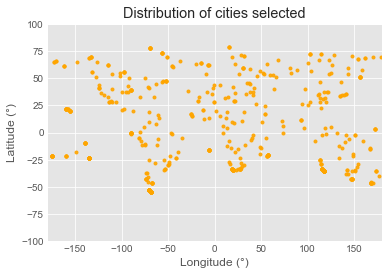

In [31]:
# Visualization distribution of citie's latidude & longitude
plt.style.use('ggplot')
plt.scatter(SCities["Longitude"], 
            SCities["Latitude"],color="orange", linewidths=1,marker=".", alpha=0.9)     
plt.title("Distribution of cities selected")
plt.ylabel("Latitude (\xb0)")
plt.xlabel("Longitude (\xb0)")
plt.xlim([-180,180])
plt.ylim([-100,100])
plt.show()

##   Plotting the Data

##  Latitude vs. Temperature Plot

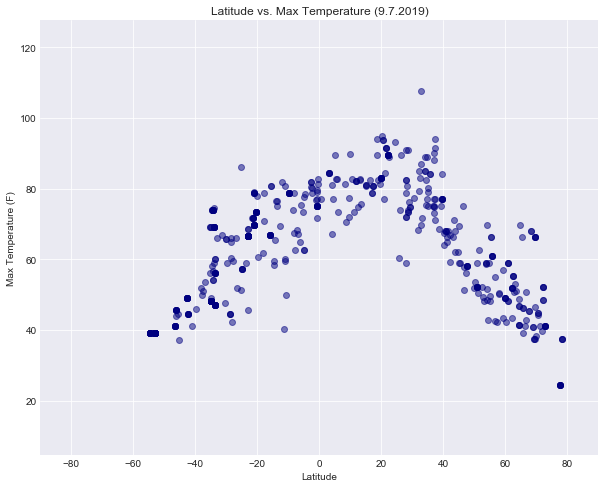

In [24]:
#Plotting and labeling 
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(City_weather['Lat'], City_weather['Max Temp'], c='navy',alpha=.5, linewidth=1, edgecolor='navy')
ax.set_xlim(-90, 90)
ax.set_ylim(min(City_weather['Max Temp'])-20, max(City_weather['Max Temp'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("Latitude vs. Max Temperature (9.7.2019)")
# Save for each plot as .pngs
plt.savefig("Lat-MaxTemp-9.7.2019.png")
plt.show()

##  Latitude vs. Humidity Plot

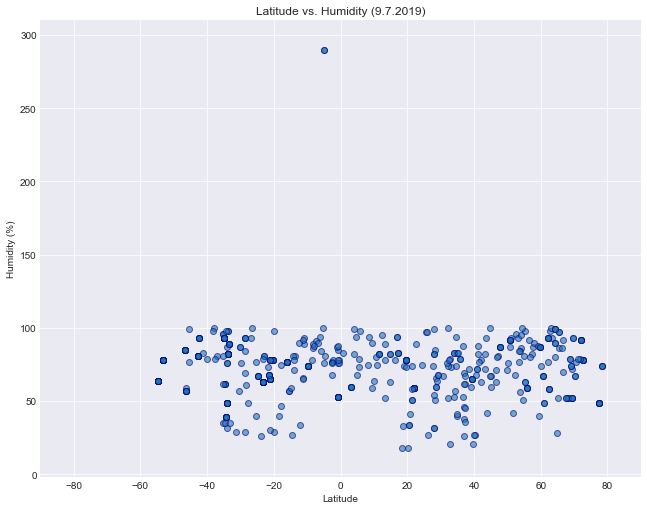

In [28]:
#Plotting and labeling 
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Humidity', data=City_weather, size = 7,
           aspect=1.3,palette="navy", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'navy',"marker":'o'}, fit_reg=False)
g = (g.set_axis_labels("Latitude","Humidity (%)")
     .set(xlim=(-90, 90), ylim=(min(City_weather['Humidity'])-20, max(City_weather['Humidity'])+20)))
plt.title("Latitude vs. Humidity (9.7.2019)")
# Save for each plot as .pngs
plt.savefig("Lat-Humidity-9.7.2019.png")
plt.show()

##  Latitude vs. Cloudiness Plot

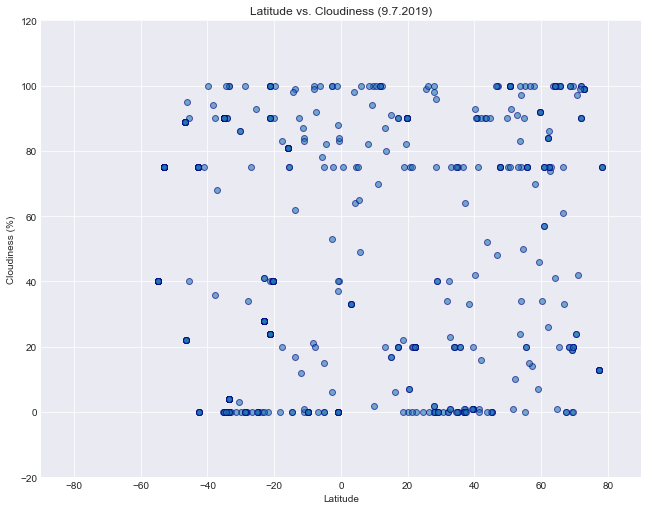

In [29]:
#Plotting and labeling 
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Cloudiness', data=City_weather, size = 7,
           aspect=1.3,palette="navy", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'navy',"marker":'o'}, fit_reg=False)
g = (g.set_axis_labels("Latitude","Cloudiness (%)")
     .set(xlim=(-90, 90), ylim=(min(City_weather['Cloudiness'])-20, max(City_weather['Cloudiness'])+20)))
plt.title("Latitude vs. Cloudiness (9.7.2019)")
# Save for each plot as .pngs
plt.savefig("Lat-Cloudiness-9.7.2019.png")
plt.show()

##  Latitude vs. Wind Speed Plot

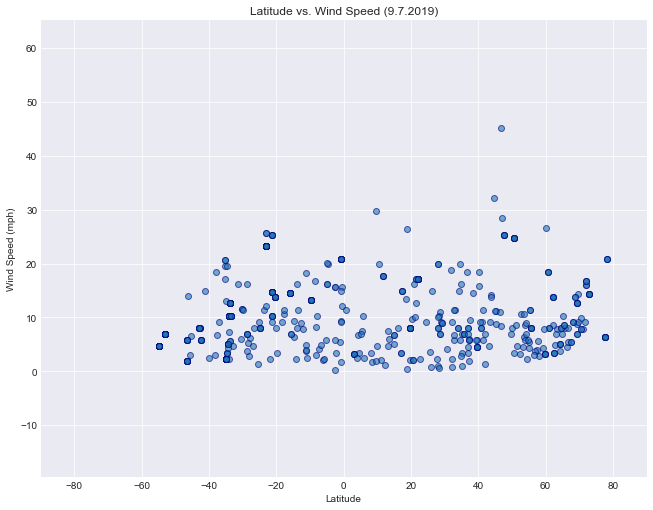

In [30]:
#Plotting and labeling 
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Wind Speed', data=City_weather, size = 7,
           aspect=1.3,palette="navy", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'navy',"marker":'o'}, fit_reg=False)
g = (g.set_axis_labels("Latitude","Wind Speed (mph)")
     .set(xlim=(-90, 90), ylim=(min(City_weather['Wind Speed'])-20, max(City_weather['Wind Speed'])+20)))
plt.title("Latitude vs. Wind Speed (9.7.2019)")
# Save for each plot as .pngs
plt.savefig("Lat-WindSpeed-9.7.2019.png")
plt.show()